# Movie Dataset Analysis

#### Movie data set for understanding characteristics of a successful movie
We are trying to understand the characteristics of a successful movie based on the following information:
* Movie information: Genre, Duration, Plot keywords, Top-3 actors, Rating, Title year, aspect ratio, Director, Facebook likes, Faces on the poster
* Actor information: Facebook likes, Oscars won, movie frequency
* Director information: Movie frequency, Facebook likes
* Other information: Number of critics, Number of reviews

## Step 1: Data Preprocessing

Reading in the files

In [1]:
import pandas as pd
import numpy as np

In [2]:
movies_df = pd.read_csv('movies.csv')

Looking at the first 5 rows of the Table

In [3]:
movies_df.head()

,id,movie_title,movie_facebook_likes,color,director_name,prolific_director,director_facebook_likes,actor_1_name,actor_2_name,actor_3_name,...,num_user_for_reviews,language,country,content_rating,title_year,imdb_score,oscar_nom_movie,oscar_nom_actor,duration,aspect_ratio
0,1,Intolerance: Love's Struggle Throughout the Ages,691,Black and White,D.W. Griffith,1,204.0,Lillian Gish,Mae Marsh,Walter Long,...,88.0,None,USA,Unrated,1916.0,8.0,0,1,123.0,1.33
1,2,Over the Hill to the Poorhouse,0,Black and White,Harry F. Millarde,1,0.0,Stephen Carr,Johnnie Walker,Mary Carr,...,1.0,None,USA,Missing,1920.0,4.8,0,0,110.0,1.33
2,3,The Big Parade,226,Black and White,King Vidor,3,54.0,John Gilbert,RenÃ©e AdorÃ©e,Claire Adams,...,45.0,None,USA,Unrated,1925.0,8.3,0,0,151.0,1.33
3,4,Metropolis,12000,Black and White,Fritz Lang,1,756.0,Brigitte Helm,Gustav FrÃ¶hlich,Rudolf Klein-Rogge,...,413.0,German,Germany,Unrated,1927.0,8.3,0,0,145.0,1.33
4,5,The Broadway Melody,1718,Black and White,Harry Beaumont,1,4.0,Anita Page,Bessie Love,Charles King,...,71.0,English,USA,PG,1929.0,6.3,2,1,100.0,1.37


Looking at the column names

In [4]:
movies_df.columns

Index(['id', 'movie_title', 'movie_facebook_likes', 'color', 'director_name',
       'prolific_director', 'director_facebook_likes', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'prolific_actor_1', 'prolific_actor_2',
       'prolific_actor_3', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
       'actor_3_facebook_likes', 'budget', 'gross', 'genres',
       'num_critic_for_reviews', 'num_voted_users', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'title_year', 'imdb_score',
       'oscar_nom_movie', 'oscar_nom_actor', 'duration', 'aspect_ratio'],
      dtype='object')

Exploring data type of each variable

In [5]:
movies_df.dtypes

id                           int64
movie_title                 object
movie_facebook_likes         int64
color                       object
director_name               object
prolific_director            int64
director_facebook_likes    float64
actor_1_name                object
actor_2_name                object
actor_3_name                object
prolific_actor_1            object
prolific_actor_2            object
prolific_actor_3            object
actor_1_facebook_likes       int64
actor_2_facebook_likes     float64
actor_3_facebook_likes     float64
budget                     float64
gross                      float64
genres                      object
num_critic_for_reviews     float64
num_voted_users              int64
facenumber_in_poster       float64
plot_keywords               object
movie_imdb_link             object
num_user_for_reviews       float64
language                    object
country                     object
content_rating              object
title_year          

Replacing missing string values with NAs

In [6]:
movies_df = movies_df.replace(['Missing','Unknown', 'None'], np.nan)

Visualizing the Missing values in the data

In [7]:
import missingno as mn

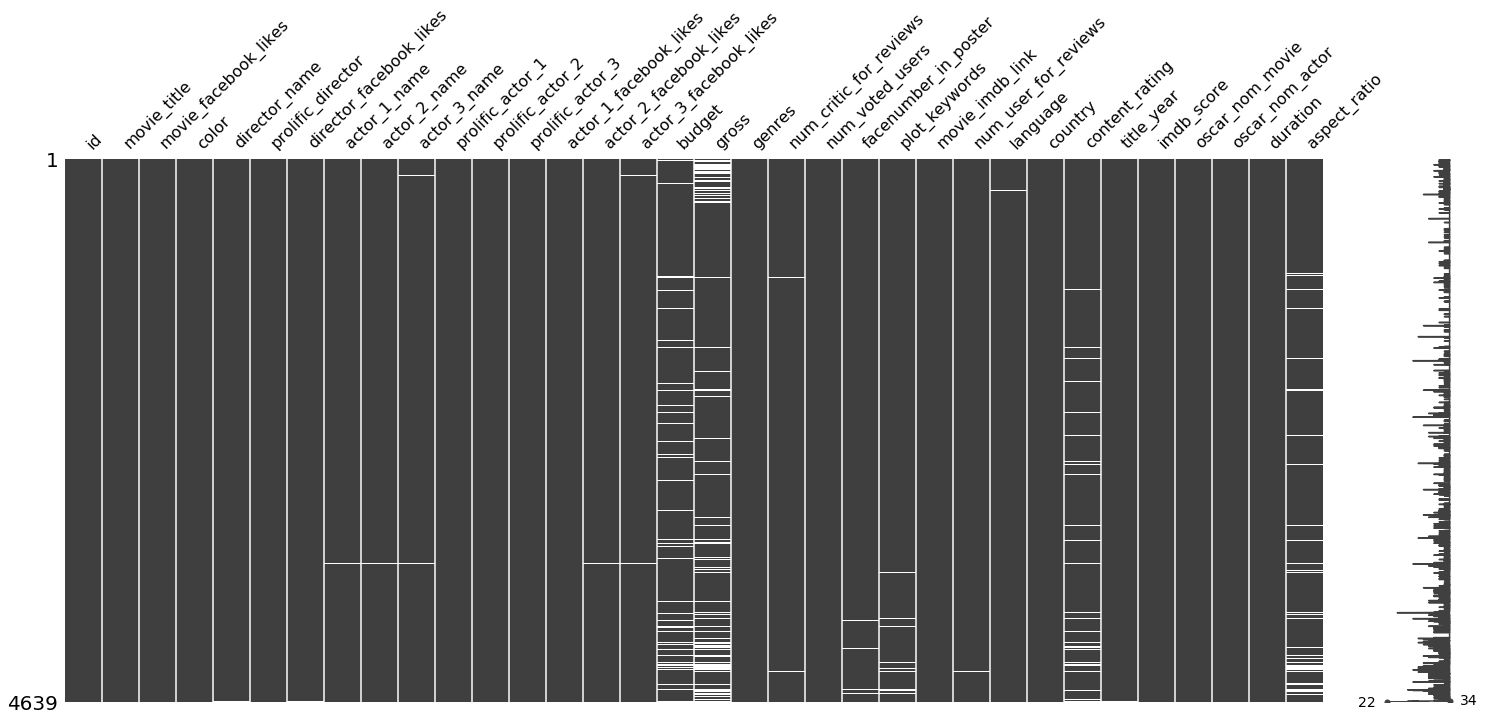

In [8]:
mn.matrix(movies_df)

- The above chart displays the missing values with white empty lines in each column
- The bar chart on the size shows the number of values present row-wise, in this case the values range from 22 per row to 34 per row

Looking at the percentage of missing values per column

In [9]:
mov_missing = pd.DataFrame((movies_df.isna().mean().round(4) * 100)).reset_index()
mov_missing.columns = ['Columns', 'Missing Value (%)']
mov_missing.loc[mov_missing['Missing Value (%)'] > 0, :].sort_values(by = 'Missing Value (%)', ascending = False)

,Columns,Missing Value (%)
17,gross,15.48
16,budget,8.11
33,aspect_ratio,6.17
27,content_rating,5.26
22,plot_keywords,2.78
19,num_critic_for_reviews,0.78
9,actor_3_name,0.39
15,actor_3_facebook_likes,0.39
3,color,0.32
24,num_user_for_reviews,0.28


We can see that gross ('Gross Box office') earnings is missing the most amount of data with more than 15% of the entries in the column missing. This is followed by the budget column and aspect_ratio column.

Creating separate columns for movie genres to identify secondary genres in new columns

In [10]:
movies_df['genre_1'], movies_df['genre_2'], movies_df['genre_3'], movies_df['genre_4'], movies_df['genre_5'], movies_df['genre_6'], movies_df['genre_7'], movies_df['genre_8'] = movies_df['genres'].str.split('|', 7).str

Creating separate columns for movie plot summary to identify all the plots in the data

In [11]:
movies_df['plot_1'], movies_df['plot_2'], movies_df['plot_3'], movies_df['plot_4'], movies_df['plot_5'] = movies_df['plot_keywords'].str.split('|', 4).str

Subsetting only the movies in English and made in the USA

In [12]:
movies_df = movies_df.loc[(movies_df['language'] == 'English') & (movies_df['country'] == 'USA'),].reset_index(drop = True)

Calculating ROI ($) & ROI (%) for comparison across genres

In [13]:
movies_df['ROI'] = (movies_df['gross'] - movies_df['budget'])
movies_df['ROI_perc'] = (movies_df['gross'] - movies_df['budget'])/movies_df['budget']

Creating Genre names as columns for further analysis

In [14]:
genre_list = movies_df['genre_1'].unique().tolist()
genre_list.extend(movies_df['genre_2'].unique())
genre_list.extend(movies_df['genre_3'].unique())
genre_list.extend(movies_df['genre_4'].unique())
genre_list.extend(movies_df['genre_5'].unique())
genre_list.extend(movies_df['genre_6'].unique())
genre_list.extend(movies_df['genre_7'].unique())
genre_list.extend(movies_df['genre_8'].unique())

genre_list = list(set(genre_list))

genre_list = pd.array(genre_list)
genre_list = genre_list[genre_list != 'nan']

In [15]:
for i in range(len(genre_list)):

    movies_df[genre_list[i]] = ((movies_df['genre_1'] == genre_list[i]) | (movies_df['genre_2'] == genre_list[i]) | (movies_df['genre_3'] == genre_list[i]) | (movies_df['genre_4'] == genre_list[i]) | (movies_df['genre_5'] == genre_list[i]) | (movies_df['genre_6'] == genre_list[i]) | (movies_df['genre_7'] == genre_list[i]) | (movies_df['genre_8'] == genre_list[i]))
    movies_df[genre_list[i]] = movies_df[genre_list[i]].apply(int)

Identifying the top mentioned genres in the dataset

* We notice that 92% of the movies in the dataset belong to one of the Top-5 genre

In [16]:
(movies_df.iloc[:, -23:].sum()/len(movies_df)*100).sort_values(ascending = False)

Drama          48.715020
Comedy         40.234152
Thriller       27.669903
Action         22.701314
Romance        22.015991
Adventure      18.046830
Crime          17.618504
Fantasy        12.507139
Sci-Fi         12.364363
Horror         11.479155
Family         11.279269
Mystery         9.594517
Biography       4.882924
Animation       4.768704
Music           4.711593
Sport           4.026271
War             2.912621
History         2.884066
Musical         2.884066
Documentary     2.341519
Western         1.941748
Film-Noir       0.171331
News            0.057110
dtype: float64

### Using the genre/actor data to create a dataset for a wordcloud

In [17]:
gencols = movies_df.columns[movies_df.columns.to_series().str.contains('genre_')]

for i in gencols:
        globals()[(i + '_tbl')] = movies_df.pivot_table(index = [i, 
                                            'title_year', 
                                            'id', 
                                            'movie_title',
                                            'country',
                                            'language'], 
                                   values = ['gross', 
                                             'budget', 
                                             'ROI',
                                             'imdb_score',
                                             'movie_facebook_likes'], 
                                   aggfunc= np.sum).reset_index()

In [18]:
genre_1_tbl.columns = ['genre', 'title_year', 'id', 'movie_title', 'country', 'language','ROI', 'budget', 'gross', 'imdb_score', 'movie_facebook_likes']
genre_2_tbl.columns = ['genre', 'title_year', 'id', 'movie_title', 'country', 'language','ROI', 'budget', 'gross', 'imdb_score', 'movie_facebook_likes']
genre_3_tbl.columns = ['genre', 'title_year', 'id', 'movie_title', 'country', 'language','ROI', 'budget', 'gross', 'imdb_score', 'movie_facebook_likes']
genre_4_tbl.columns = ['genre', 'title_year', 'id', 'movie_title', 'country', 'language','ROI', 'budget', 'gross', 'imdb_score', 'movie_facebook_likes']
genre_5_tbl.columns = ['genre', 'title_year', 'id', 'movie_title', 'country', 'language','ROI', 'budget', 'gross', 'imdb_score', 'movie_facebook_likes']
genre_6_tbl.columns = ['genre', 'title_year', 'id', 'movie_title', 'country', 'language','ROI', 'budget', 'gross', 'imdb_score', 'movie_facebook_likes']
genre_7_tbl.columns = ['genre', 'title_year', 'id', 'movie_title', 'country', 'language','ROI', 'budget', 'gross', 'imdb_score', 'movie_facebook_likes']
genre_8_tbl.columns = ['genre', 'title_year', 'id', 'movie_title', 'country', 'language','ROI', 'budget', 'gross', 'imdb_score', 'movie_facebook_likes']

In [19]:
genre_tbl = genre_1_tbl.append(genre_2_tbl).append(genre_3_tbl).append(genre_4_tbl).append(genre_5_tbl).append(genre_6_tbl).append(genre_7_tbl).append(genre_8_tbl)
genre_tbl['title_year'] = genre_tbl['title_year'].apply(int)

File to be exported for wordcloud

In [20]:
#genre_tbl.to_csv('genre_table.csv', encoding = 'utf-8')

Creating the dataset for actors for Wordcloud generation

In [21]:
actcols = ['actor_1_name', 'actor_2_name', 'actor_3_name']

for i in actcols:
        globals()[(i + '_tbl')] = movies_df.pivot_table(index = [i, 
                                            'title_year', 
                                            'id', 
                                            'movie_title',
                                            'country',
                                            'language',
                                            'director_name'],
                                   values = ['gross', 
                                             'budget', 
                                             'ROI'], 
                                   aggfunc= np.sum).reset_index()

In [22]:
# Cleaning up the column names
actor_1_name_tbl.columns = ['actor_name', 
                            'title_year', 
                            'id', 
                            'movie_title', 
                            'country',
                            'language',
                            'director_name',
                            'ROI', 
                            'budget', 
                            'gross']
actor_2_name_tbl.columns = ['actor_name', 
                            'title_year', 
                            'id', 
                            'movie_title',
                            'country',
                            'language',
                            'director_name',
                            'ROI', 
                            'budget', 
                            'gross']
actor_3_name_tbl.columns = ['actor_name', 
                            'title_year', 
                            'id', 
                            'movie_title',
                            'country',
                            'language',
                            'director_name',
                            'ROI', 
                            'budget', 
                            'gross']

actor_tbl = actor_1_name_tbl.append(actor_2_name_tbl).append(actor_3_name_tbl)
actor_tbl['title_year'] = actor_tbl['title_year'].apply(int)

In [23]:
actor_tbl['decade'] = ((actor_tbl['title_year']/10).apply(np.floor)*10).apply(int)

In [24]:
actor_tbl['ROI_perc'] = actor_tbl['ROI']/actor_tbl['budget']

Removing actors with less than 3 movies in the decade

In [25]:
actors_movies = actor_tbl.groupby(['decade','actor_name'])['id'].count().reset_index()

In [26]:
actor_tbl = actor_tbl.merge(actors_movies, on = ['decade', 'actor_name'], how = 'left')
actor_tbl = actor_tbl.loc[actor_tbl['id_y'] >= 3, :]

In [27]:
actor_tbl = actor_tbl.drop('id_y', axis = 1)

In [28]:
actor_tbl.columns = ['actor_name', 'title_year', 'id', 'movie_title', 'country',
       'language', 'director_name', 'ROI', 'budget', 'gross', 'decade',
       'ROI_perc']

In [29]:
numtop10actors = actor_tbl.groupby(['decade','actor_name'])['id'].count().reset_index()

In [30]:
numtop10actors = numtop10actors.sort_values(['decade', 'id'], ascending= False)
numtop10actors = numtop10actors.groupby('decade').head(10)

Merge with original dataset to identify the actors with most movies

In [31]:
actor_tbl = actor_tbl.merge(numtop10actors, on = ['decade', 'actor_name'], how = 'left')
actor_tbl.loc[~actor_tbl['id_y'].isnull(),'id_y'] = 1
actor_tbl['id_y'] = actor_tbl['id_y'].fillna(0)

In [32]:
actor_tbl.columns = ['actor_name', 'title_year', 'id', 'movie_title', 'country',
       'language', 'director_name', 'ROI', 'budget', 'gross', 'decade',
       'ROI_perc', 'most_movies']

In [33]:
roitop10actors = actor_tbl.groupby(['decade','actor_name'])['ROI'].median().reset_index() #top actors by ROI
grosstop10actors = actor_tbl.groupby(['decade','actor_name'])['gross'].median().reset_index() # top actors by Box office earnings
roiperctop10actors = actor_tbl.groupby(['decade','actor_name'])['ROI_perc'].median().reset_index() # top actors by ROI (%)

In [34]:
# filtering the top 10 for each measure
roitop10actors = roitop10actors.sort_values(['decade', 'ROI'], ascending = False)
roitop10actors = roitop10actors.groupby('decade').head(10)

grosstop10actors = grosstop10actors.sort_values(['decade', 'gross'], ascending = False)
grosstop10actors = grosstop10actors.groupby('decade').head(10)

roiperctop10actors = roiperctop10actors.sort_values(['decade', 'ROI_perc'], ascending = False)
roiperctop10actors = roiperctop10actors.groupby('decade').head(10)

Merge with original dataset to identify actors with highest ROI ($)

In [35]:
actor_tbl = actor_tbl.merge(roitop10actors, on = ['decade', 'actor_name'], how = 'left')
actor_tbl.loc[~actor_tbl['ROI_y'].isnull(),'ROI_y'] = 1
actor_tbl['ROI_y'] = actor_tbl['ROI_y'].fillna(0)

In [36]:
actor_tbl.columns = ['actor_name', 'title_year', 'id', 'movie_title', 'country',
       'language', 'director_name', 'ROI', 'budget', 'gross', 'decade',
       'ROI_perc', 'most_movies', 'highest_ROI']

Merging with original dataset to identify the actors with top grossing movies

In [37]:
actor_tbl = actor_tbl.merge(grosstop10actors, on = ['decade', 'actor_name'], how = 'left')
actor_tbl.loc[~actor_tbl['gross_y'].isnull(),'gross_y'] = 1
actor_tbl['gross_y'] = actor_tbl['gross_y'].fillna(0)

In [38]:
actor_tbl.columns = ['actor_name', 'title_year', 'id', 'movie_title', 'country',
       'language', 'director_name', 'ROI', 'budget', 'gross', 'decade',
       'ROI_perc', 'most_movies', 'highest_ROI', 'highest_gross']

Merging with original dataset to identify the actors with highest ROI (%)

In [39]:
actor_tbl = actor_tbl.merge(roiperctop10actors, on = ['decade', 'actor_name'], how = 'left')
actor_tbl.loc[~actor_tbl['ROI_perc_y'].isnull(),'ROI_perc_y'] = 1
actor_tbl['ROI_perc_y'] = actor_tbl['ROI_perc_y'].fillna(0)

In [40]:
actor_tbl.columns = ['actor_name', 'title_year', 'id', 'movie_title', 'country',
       'language', 'director_name', 'ROI', 'budget', 'gross', 'decade',
       'ROI_perc', 'most_movies', 'highest_ROI', 'highest_gross', 'highest_ROIperc']

File to be exported for the wordcloud

In [41]:
#actor_tbl.to_csv('actor_table.csv', encoding = 'utf-8')

Similar calculation for directors

In [42]:
movies_df['decade'] = ((movies_df['title_year'].fillna(0)/10).apply(np.floor)*10).apply(int)

In [43]:
movies_df.columns

Index(['id', 'movie_title', 'movie_facebook_likes', 'color', 'director_name',
       'prolific_director', 'director_facebook_likes', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'prolific_actor_1', 'prolific_actor_2',
       'prolific_actor_3', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
       'actor_3_facebook_likes', 'budget', 'gross', 'genres',
       'num_critic_for_reviews', 'num_voted_users', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'title_year', 'imdb_score',
       'oscar_nom_movie', 'oscar_nom_actor', 'duration', 'aspect_ratio',
       'genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6',
       'genre_7', 'genre_8', 'plot_1', 'plot_2', 'plot_3', 'plot_4', 'plot_5',
       'ROI', 'ROI_perc', 'Fantasy', 'Musical', 'Documentary', 'Sport',
       'Western', 'Music', 'News', 'Horror', 'Crime', 'War', 'Film-Noir',
       'Action', 'Biography', 'Mystery', 

In [44]:
roitop10directors = movies_df.groupby(['decade','director_name'])['ROI'].median().reset_index().sort_values(['decade', 'ROI'], ascending = False).groupby('decade').head(10) #top actors by ROI
grosstop10directors = movies_df.groupby(['decade','director_name'])['gross'].median().reset_index().sort_values(['decade', 'gross'], ascending = False).groupby('decade').head(10) #top directors by gross box office earnings 
roiperctop10directors = movies_df.groupby(['decade','director_name'])['ROI_perc'].median().reset_index().sort_values(['decade', 'ROI_perc'], ascending = False).groupby('decade').head(10) #top actors by ROI (%)

## Step 2: Exploratory Data Analysis

### Correlation among variables in the data

In [45]:
movies_numdf = movies_df.select_dtypes(include=np.number)
movies_numdf = movies_numdf.drop('id', axis = 1)

In [46]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 9

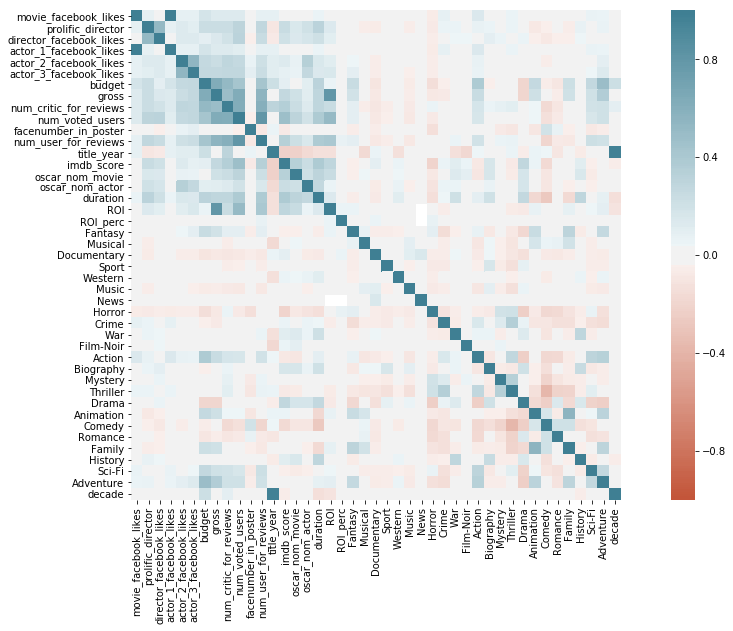

In [47]:
import seaborn as sns
corr = movies_numdf.corr()
ax = sns.heatmap(
        corr,
        #size(c1, c2) ~ abs(corr(c1, c2)),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
)

Let us transform the dataset for analysis:
* Remove some of the genres not important in the analysis
* Identifying the Top 10 actors by ROI($), ROI(%), Gross earnings
* Scaling the variables
* Remove/Impute rows with missing values

In [48]:
movies_df = movies_df.drop(['News','Film-Noir', 'Documentary','Musical','History','War','Sport', 'Music'], axis = 1)

Creating a column to identify whether any of the three actors in the movie are one of the Top 10 actors based on:
1. ROI($)
2. ROI (%) 
3. Gross box office earnings

In [49]:
# Creating 3 columns
movies_df['Actor1_ROITop10'] = 0
movies_df['Actor2_ROITop10'] = 0
movies_df['Actor3_ROITop10'] = 0

# Identifying whether actors exist in the top 10 list
movies_df.loc[movies_df['actor_1_name'].isin(roitop10actors['actor_name']), 'Actor1_ROITop10'] = 1
movies_df.loc[movies_df['actor_2_name'].isin(roitop10actors['actor_name']), 'Actor2_ROITop10'] = 1
movies_df.loc[movies_df['actor_3_name'].isin(roitop10actors['actor_name']), 'Actor3_ROITop10'] = 1

In [50]:
# Creating 3 columns
movies_df['Actor1_ROIpercTop10'] = 0
movies_df['Actor2_ROIpercTop10'] = 0
movies_df['Actor3_ROIpercTop10'] = 0

# Identifying whether actors exist in the top 10 list
movies_df.loc[movies_df['actor_1_name'].isin(roiperctop10actors['actor_name']), 'Actor1_ROIpercTop10'] = 1
movies_df.loc[movies_df['actor_2_name'].isin(roiperctop10actors['actor_name']), 'Actor2_ROIpercTop10'] = 1
movies_df.loc[movies_df['actor_3_name'].isin(roiperctop10actors['actor_name']), 'Actor3_ROIpercTop10'] = 1

In [51]:
# Creating 3 columns
movies_df['Actor1_grossTop10'] = 0
movies_df['Actor2_grossTop10'] = 0
movies_df['Actor3_grossTop10'] = 0

# Identifying whether actors exist in the top 10 list
movies_df.loc[movies_df['actor_1_name'].isin(grosstop10actors['actor_name']), 'Actor1_grossTop10'] = 1
movies_df.loc[movies_df['actor_2_name'].isin(grosstop10actors['actor_name']), 'Actor2_grossTop10'] = 1
movies_df.loc[movies_df['actor_3_name'].isin(grosstop10actors['actor_name']), 'Actor3_grossTop10'] = 1

Creating columns to identify if the director is a Top 10 director in any of the decades

In [52]:
movies_df['Director_ROITop10'] = 0
movies_df.loc[movies_df['director_name'].isin(roitop10directors['director_name']), 'Director_ROITop10'] = 1

movies_df['Director_ROIpercTop10'] = 0
movies_df.loc[movies_df['director_name'].isin(roiperctop10directors['director_name']), 'Director_ROIpercTop10'] = 1

movies_df['Director_grossTop10'] = 0
movies_df.loc[movies_df['director_name'].isin(grosstop10directors['director_name']), 'Director_grossTop10'] = 1

One hot encoding all categorical variables for use in the analysis

In [53]:
movies_df = pd.get_dummies(movies_df, columns=["color", "content_rating"])


In [54]:
# dropping these variables to ensure there is no perfect multicollinearity
movies_df = movies_df.drop(['color_Color', 'content_rating_Approved'], axis = 1)

### Updated Correlation plot with the additional information

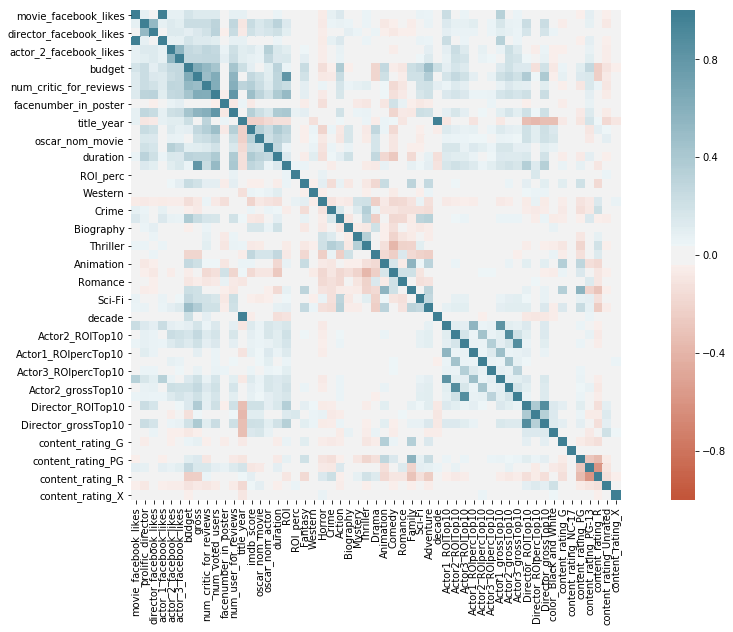

In [55]:
movies_numdf = movies_df.select_dtypes(include=np.number)
#movies_numdf = movies_numdf.drop('id', axis = 1)

import seaborn as sns
corr = movies_numdf.drop('id', axis = 1).corr()
ax = sns.heatmap(
        corr,
        #size(c1, c2) ~ abs(corr(c1, c2)),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
)

We see a lot more correlation in the data but the ROI_perc column is still not significantly correlated with any variable

### Imputing missing values

In [56]:
from sklearn.impute import SimpleImputer

fill_NaN = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_DF = pd.DataFrame(fill_NaN.fit_transform(movies_numdf)) # imputing missing values in the data frame with mean values
imputed_DF.columns = movies_numdf.columns
imputed_DF.index = movies_numdf.index

### Clustering the data to understand if there are any patterns that emerge

Let us try and understand if there are any patterns that emerge in the data when clustered together

In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 9)

kmeans.fit(imputed_DF)

y_km = kmeans.fit_predict(imputed_DF.drop('id', axis = 1))

imputed_DF['clusters_kmeans'] = y_km

Let us look at mean measures for each cluster

In [58]:
kmeans_summary = imputed_DF.pivot_table(index = 'clusters_kmeans',
                           values = ['movie_facebook_likes',
                                     'budget',
                                     'gross',
                                     'oscar_nom_movie',
                                     'duration',
                                     'ROI',
                                     'ROI_perc',
                                     'Drama',
                                     'Comedy',
                                     'Thriller',
                                     'Action',
                                     'Romance',
                                     'Adventure',
                                     'Actor1_ROITop10',
                                     'Director_ROITop10'],
                           aggfunc = [np.mean, np.std]).reset_index()

kmeans_summary

clusters_kmeans      mean                                      \
                     Action Actor1_ROITop10 Adventure    Comedy   
0               0  0.155515        0.058770  0.092224  0.358951   
1               1  0.530612        0.367347  0.775510  0.285714   
2               2  0.242222        0.144444  0.195556  0.475556   
3               3  0.436451        0.107914  0.290168  0.374101   
4               4  0.635135        0.162162  0.878378  0.324324   
5               5  0.290541        0.236486  0.290541  0.513514   
6               6  0.111504        0.047788  0.076106  0.438053   
7               7  0.800000        0.200000  0.600000  0.000000   
8               8  0.699187        0.073171  0.699187  0.268293   

                                                                  ...  \
  Director_ROITop10     Drama           ROI   ROI_perc   Romance  ...   
0          0.068716  0.487342  1.190672e+07   2.375753  0.217902  ...   
1          0.653061  0.244898  2.448820e+08   5.387488  0.163265  ...   
2          0.093333  0.422222  4.947552e+07  18.590121  0.235556  ...   
3          0.071942  0.446043 -2.332364e+07  -0.362153  0.179856  ...   
4          0.189189  0.121622  5.975319e+07   0.392425  0.040541  ...   
5          0.297297  0.398649  1.279108e+08  23.844703  0.236486  ...   
6          0.019469  0.601770 -4.551230e+06   3.532571  0.254867  ...   
7          0.800000  0.400000  4.471902e+08   2.313195  0.200000  ...   
8          0.121951  0.235772 -4.912355e+07  -0.312990  0.113821  ...   

        std                                                              \
      Drama           ROI    ROI_perc   Romance  Thriller        budget   
0  0.500066  1.211680e+07   15.019110  0.413007  0.455320  1.180441e+07   
1  0.434483  6.753789e+07    8.949764  0.373438  0.391230  6.902200e+07   
2  0.494463  2.359217e+07  339.009083  0.424818  0.460684  2.556230e+07   
3  0.497677  1.939305e+07    0.279723  0.384529  0.492437  1.717479e+07   
4  0.329079  3.793854e+07    0.267166  0.198569  0.414473  3.809848e+07   
5  0.491283  3.530459e+07  192.674541  0.426367  0.375953  3.048219e+07   
6  0.489750  9.150692e+06   81.997637  0.435980  0.418204  1.069286e+07   
7  0.547723  7.190921e+07    0.611869  0.447214  0.547723  3.347088e+07   
8  0.426217  4.424572e+07    0.269708  0.318893  0.431191  3.381889e+07   

                                                                 
    duration         gross movie_facebook_likes oscar_nom_movie  
0  19.457269  9.943548e+06         6.453845e+06        0.492830  
1  25.685914  5.756818e+07         1.542527e+07        0.693752  
2  22.496251  2.190523e+07         1.294064e+07        0.591221  
3  25.840115  1.953796e+07         1.667763e+07        0.255812  
4  26.319415  4.558406e+07         1.727408e+07        0.477560  
5  25.047345  3.440246e+07         1.391243e+07        1.025417  
6  16.045267  6.726177e+06         7.639955e+06        0.242585  
7  27.022213  8.143001e+07         7.372551e+06        1.095445  
8  24.115716  3.741644e+07         1.563357e+07        0.401085  

[9 rows x 31 columns]

In [59]:
#kmeans_summary.to_csv('kmeans_summary.csv', encoding = 'utf-8')

We can observe the following from the clusters:

* __Cluster 0__: It has high number of Drama and Comedy movies. ROI(\\$) is low and so is budget and box office return, but ROI(%) is high with an average of 300%
* __Cluster 1__: High proportion of Action and Adventure movies. ROI(%) is low but ROI(\\$) is high along with budget and box office return
* __Cluster 2__: High proportion of Action and Adventure movies. ROI(%) is very high along with ROI(\\$), budget and box office returns. Oscar nominations high
* __Cluster 3__: No genre is represented highly. Budget and box office return is moderate along with ROI(%) and ROI($)
* __Cluster 4__: Adventure heavy. Very high ROI(%) and high ROI(\\$), budget and box office return
* __Cluster 5__: Comedy and Drama are represented equally. Others moderate
* __Cluster 6__: Loss making big budget Action and Adventure movies
* __Cluster 7__: Comedy hits. Heavy on Drama. High budget, ROI and box office returns
* __Cluster 8__: Flop Family entertainers. Comedy + Drama + Action. Negative Returns, moderate budget


We need to keep in mind that the observations are dependant on the standard deviation of the measures as well, which in this case is pretty high.

## Step 3: Predictive Modeling

Assessing VIF to understand if we should eliminate some columns from the analysis

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(imputed_DF.values, i) for i in range(imputed_DF.shape[1])]
vif["features"] = imputed_DF.columns
vif.round(2).head()

,VIF Factor,features
0,7.85,id
1,338660.01,movie_facebook_likes
2,3.49,prolific_director
3,1.64,director_facebook_likes
4,338661.56,actor_1_facebook_likes


Dropping the following variables:

* movie_facebook_likes - not known until movie releases (most cases)
* num_critics_for_reviews - not known
* num_voted_users - not known
* num_users_for_review - not known
* imdb_score - not known
* oscar_nom_movie - not known
* ROI - used to calculate ROI_perc with budget
* gross - not known


In [61]:
X = imputed_DF.drop(['id',
                     'movie_facebook_likes',
                     'title_year', # because of VIF
                     'duration',
                     'ROI_perc', 
                     'gross',
                     'ROI',
                     'num_critic_for_reviews',
                     'oscar_nom_movie',
                     'decade',
                     'num_voted_users',
                     'num_user_for_reviews',
                     'imdb_score'], axis = 1) # removing variables not known before a movie releases
y = imputed_DF.ROI

### Nearest Neighbor model to predict ROI

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X,y)
preds = knn.predict(X)

SST = np.sum((np.mean(y) - y)**2)
SSE = np.sum((preds - y)**2)

1 - (SSE/SST) # R2

0.15029562391963858

### OLS model to predict ROI

In [63]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
ols_summary = pd.DataFrame(data = {'coefs':round(model.params,2), 'pvals':round(model.pvalues,2)})

ols_summary.loc[ols_summary['pvals'] <= 0.05,:]

,coefs,pvals
prolific_director,644027.66,0.00
actor_2_facebook_likes,489.70,0.02
actor_3_facebook_likes,2779.50,0.00
budget,-0.09,0.00
facenumber_in_poster,-765640.13,0.04
oscar_nom_actor,-939594.92,0.00
Western,-12047016.43,0.03
Thriller,-5551803.61,0.01
Drama,-3604747.52,0.04
Actor2_ROITop10,25311263.13,0.00


### Tree based model to predict ROI

Using a Random Forest model to predict ROI

In [64]:
y = np.array(y)

feature_list = list(X.columns) # saving feature names for later use
X = np.array(X)

In [65]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                            y, 
                                                                            test_size = 0.3, 
                                                                            random_state = 100)

Baseline Error

In [66]:
baseline_preds = train_labels.mean()

baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  29342993.63


In [67]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, 
                           random_state = 100)

# Train the model on training data
rf.fit(train_features, train_labels);

In [68]:
pred_train = rf.predict(train_features)
er = abs(pred_train - train_labels)
np.mean(er)

4502971.009305181

Making predictions on the test set

In [69]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

OOS R2:

In [70]:
SST = np.sum((np.mean(train_labels) - test_labels)**2)
SSE = np.sum((predictions - test_labels)**2)

1 - (SSE/SST)

0.8561424018583643

__Variable Importances__

In [71]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: clusters_kmeans      Importance: 0.67
Variable: budget               Importance: 0.11
Variable: Director_ROITop10    Importance: 0.04
Variable: director_facebook_likes Importance: 0.03
Variable: actor_3_facebook_likes Importance: 0.03
Variable: prolific_director    Importance: 0.02
Variable: actor_1_facebook_likes Importance: 0.02
Variable: actor_2_facebook_likes Importance: 0.02
Variable: facenumber_in_poster Importance: 0.01
Variable: oscar_nom_actor      Importance: 0.01
Variable: Sci-Fi               Importance: 0.01
Variable: Adventure            Importance: 0.01
Variable: Director_grossTop10  Importance: 0.01
Variable: Fantasy              Importance: 0.0
Variable: Western              Importance: 0.0
Variable: Horror               Importance: 0.0
Variable: Crime                Importance: 0.0
Variable: Action               Importance: 0.0
Variable: Biography            Importance: 0.0
Variable: Mystery              Importance: 0.0
Variable: Thriller             Importa

### Model to predict Likeability

#### 1. OLS Facebook likes

In [72]:
X = imputed_DF.drop(['id',
                     'movie_facebook_likes',
                     'title_year', # because of VIF
                     'duration',
                     'ROI_perc', 
                     'gross',
                     'ROI',
                     'num_critic_for_reviews',
                     'oscar_nom_movie',
                     'decade',
                     'num_voted_users',
                     'num_user_for_reviews',
                     'actor_1_facebook_likes', # data issue - most values are exactly same as movie likes
                     'imdb_score'], axis = 1) # removing variables not known before a movie releases
y = imputed_DF.movie_facebook_likes

In [73]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X,y)
preds = knn.predict(X)
SST = np.sum((np.mean(y) - y)**2)
SSE = np.sum((preds - y)**2)

1 - (SSE/SST) # R2

0.14945827108844867

In [74]:
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()
# Print out the statistics
ols_summary = pd.DataFrame(data = {'coefs':round(model.params,2), 'pvals':round(model.pvalues,2)})
ols_summary.loc[ols_summary['pvals'] <= 0.05,:]

,coefs,pvals
actor_3_facebook_likes,263.65,0.02
budget,0.03,0.00
oscar_nom_actor,-208133.26,0.00
Fantasy,-1265040.92,0.02
Horror,-1268871.81,0.04
Crime,1462319.22,0.00
Action,1401097.71,0.01
Family,2145346.91,0.01
Actor1_ROIpercTop10,-6102954.91,0.00
Actor1_grossTop10,16649425.83,0.00


In [75]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: clusters_kmeans      Importance: 0.67
Variable: budget               Importance: 0.11
Variable: Director_ROITop10    Importance: 0.04
Variable: director_facebook_likes Importance: 0.03
Variable: actor_3_facebook_likes Importance: 0.03
Variable: prolific_director    Importance: 0.02
Variable: actor_1_facebook_likes Importance: 0.02
Variable: actor_2_facebook_likes Importance: 0.02
Variable: facenumber_in_poster Importance: 0.01
Variable: oscar_nom_actor      Importance: 0.01
Variable: Sci-Fi               Importance: 0.01
Variable: Adventure            Importance: 0.01
Variable: Director_grossTop10  Importance: 0.01
Variable: Fantasy              Importance: 0.0
Variable: Western              Importance: 0.0
Variable: Horror               Importance: 0.0
Variable: Crime                Importance: 0.0
Variable: Action               Importance: 0.0
Variable: Biography            Importance: 0.0
Variable: Mystery              Importance: 0.0
Variable: Thriller             Importa

#### 2. Random Forest Facebook Likes

Using a Random Forest model to predict ROI

In [76]:
X = imputed_DF.drop(['id',
                     'movie_facebook_likes',
                     'title_year', # because of VIF
                     'duration',
                     'ROI_perc', 
                     'gross',
                     'ROI',
                     'num_critic_for_reviews',
                     'oscar_nom_movie',
                     'decade',
                     'num_voted_users',
                     'num_user_for_reviews',
                     'actor_1_facebook_likes', # data issue - most values are exactly same as movie likes
                     'imdb_score'], axis = 1) # removing variables not known before a movie releases
y = imputed_DF.movie_facebook_likes

In [77]:
y = np.array(y)

feature_list = list(X.columns) # saving feature names for later use
X = np.array(X)

In [78]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                            y, 
                                                                            test_size = 0.3, 
                                                                            random_state = 100)

Baseline Error

In [79]:
baseline_preds = train_labels.mean()

baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  4787358.25


In [80]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, 
                           random_state = 100)

# Train the model on training data
rf.fit(train_features, train_labels);

In [81]:
pred_train = rf.predict(train_features)
er = abs(pred_train - train_labels)
np.mean(er)

1596982.7281742147

Making predictions on the test set

In [82]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

OOS R2:

In [83]:
SST = np.sum((np.mean(train_labels) - test_labels)**2)
SSE = np.sum((predictions - test_labels)**2)

1 - (SSE/SST)

0.3569489469240126

__Variable Importances__

In [84]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: budget               Importance: 0.11
Variable: actor_2_facebook_likes Importance: 0.1
Variable: actor_3_facebook_likes Importance: 0.1
Variable: director_facebook_likes Importance: 0.09
Variable: oscar_nom_actor      Importance: 0.09
Variable: Actor1_grossTop10    Importance: 0.09
Variable: prolific_director    Importance: 0.06
Variable: facenumber_in_poster Importance: 0.05
Variable: Action               Importance: 0.03
Variable: clusters_kmeans      Importance: 0.03
Variable: Crime                Importance: 0.02
Variable: Thriller             Importance: 0.02
Variable: Sci-Fi               Importance: 0.02
Variable: Actor1_ROITop10      Importance: 0.02
Variable: Actor1_ROIpercTop10  Importance: 0.02
Variable: Fantasy              Importance: 0.01
Variable: Horror               Importance: 0.01
Variable: Drama                Importance: 0.01
Variable: Comedy               Importance: 0.01
Variable: Romance              Importance: 0.01
Variable: Family               Impo

 ## Replicating the models for last 3 years

Subsetting data to last 3 years

In [111]:
imputed_DFL3 = imputed_DF.loc[imputed_DF['title_year'] >= 2013,:]

In [112]:
X = imputed_DFL3.drop(['id',
                     'movie_facebook_likes',
                     'title_year', # because of VIF
                     'duration',
                     'ROI_perc', 
                     'gross',
                     'ROI',
                     'num_critic_for_reviews',
                     'oscar_nom_movie',
                     'decade',
                     'num_voted_users',
                     'num_user_for_reviews',
                     'imdb_score'], axis = 1) # removing variables not known before a movie releases
y = imputed_DFL3.ROI

### 1. OLS Model for ROI

In [113]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
ols_summary = pd.DataFrame(data = {'coefs':round(model.params,2), 'pvals':round(model.pvalues,2)})

ols_summary.loc[ols_summary['pvals'] <= 0.05,:]

/Users/mayank/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/mayank/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mayank/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mayank/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,coefs,pvals
Comedy,16421041.84,0.00
Sci-Fi,28608986.90,0.00
Actor1_ROITop10,61208496.88,0.00
Actor2_ROIpercTop10,-37555731.47,0.01
Actor3_ROIpercTop10,41055493.54,0.01
Actor1_grossTop10,-48818039.28,0.00
Director_grossTop10,64948441.69,0.00
content_rating_PG-13,12825390.81,0.05
content_rating_R,20983730.35,0.00
clusters_kmeans,-4906850.40,0.00


### 2. RF Model for ROI

In [114]:
y = np.array(y)

feature_list = list(X.columns) # saving feature names for later use
X = np.array(X)

In [115]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                            y, 
                                                                            test_size = 0.3, 
                                                                            random_state = 100)

Baseline Error

In [116]:
baseline_preds = train_labels.mean()

baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  28697494.45


In [117]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, 
                           random_state = 100)

# Train the model on training data
rf.fit(train_features, train_labels);

In [118]:
pred_train = rf.predict(train_features)
er = abs(pred_train - train_labels)
np.mean(er)

6186460.484737113

Making predictions on the test set

In [119]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

OOS R2:

In [120]:
SST = np.sum((np.mean(train_labels) - test_labels)**2)
SSE = np.sum((predictions - test_labels)**2)

1 - (SSE/SST)

0.6941826542069861

__Variable Importances__

In [121]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: clusters_kmeans      Importance: 0.37
Variable: Director_grossTop10  Importance: 0.16
Variable: prolific_director    Importance: 0.15
Variable: budget               Importance: 0.09
Variable: director_facebook_likes Importance: 0.04
Variable: Director_ROITop10    Importance: 0.03
Variable: actor_2_facebook_likes Importance: 0.02
Variable: actor_3_facebook_likes Importance: 0.02
Variable: actor_1_facebook_likes Importance: 0.01
Variable: facenumber_in_poster Importance: 0.01
Variable: oscar_nom_actor      Importance: 0.01
Variable: Fantasy              Importance: 0.01
Variable: Action               Importance: 0.01
Variable: Comedy               Importance: 0.01
Variable: Actor1_ROITop10      Importance: 0.01
Variable: Actor2_ROITop10      Importance: 0.01
Variable: Actor1_ROIpercTop10  Importance: 0.01
Variable: Director_ROIpercTop10 Importance: 0.01
Variable: content_rating_PG-13 Importance: 0.01
Variable: Western              Importance: 0.0
Variable: Horror               

Exporting one tree for visualization

In [122]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree_roi.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree_roi.dot')
graph.write_png('small_tree_roi.png');

### 3. OLS Model for Facebook Likes

In [97]:
X = imputed_DFL3.drop(['id',
                     'movie_facebook_likes',
                     'title_year', # because of VIF
                     'duration',
                     'ROI_perc', 
                     'gross',
                     'ROI',
                     'num_critic_for_reviews',
                     'oscar_nom_movie',
                     'decade',
                     'num_voted_users',
                     'num_user_for_reviews',
                     'actor_1_facebook_likes', # data issue - most values are exactly same as movie likes
                     'imdb_score'], axis = 1) # removing variables not known before a movie releases
y = imputed_DFL3.movie_facebook_likes

In [98]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X,y)
preds = knn.predict(X)
SST = np.sum((np.mean(y) - y)**2)
SSE = np.sum((preds - y)**2)

1 - (SSE/SST) # R2

0.15520986020834404

In [99]:
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
ols_summary = pd.DataFrame(data = {'coefs':round(model.params,2), 'pvals':round(model.pvalues,2)})
ols_summary.loc[ols_summary['pvals'] <= 0.05,:]

/Users/mayank/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/mayank/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mayank/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mayank/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,coefs,pvals
Action,2751957.15,0.04
Adventure,4685836.22,0.01
Actor1_ROIpercTop10,-6693039.71,0.01
Actor1_grossTop10,17904335.59,0.00


### 4. Random Forest for Facebook Likes

In [100]:
y = np.array(y)

feature_list = list(X.columns) # saving feature names for later use
X = np.array(X)

In [101]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, 
                                                                            y, 
                                                                            test_size = 0.3, 
                                                                            random_state = 100)

Baseline Error

In [102]:
baseline_preds = train_labels.mean()

baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5340391.09


In [103]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, 
                           random_state = 100)

# Train the model on training data
rf.fit(train_features, train_labels);

In [104]:
pred_train = rf.predict(train_features)
er = abs(pred_train - train_labels)
np.mean(er)

2143260.4895850513

Making predictions on the test set

In [105]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

OOS R2:

In [106]:
SST = np.sum((np.mean(train_labels) - test_labels)**2)
SSE = np.sum((predictions - test_labels)**2)

1 - (SSE/SST)

0.19368596197613752

__Variable Importances__

In [107]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: facenumber_in_poster Importance: 0.14
Variable: actor_3_facebook_likes Importance: 0.11
Variable: budget               Importance: 0.09
Variable: Actor1_grossTop10    Importance: 0.09
Variable: actor_2_facebook_likes Importance: 0.08
Variable: director_facebook_likes Importance: 0.07
Variable: Action               Importance: 0.07
Variable: oscar_nom_actor      Importance: 0.05
Variable: prolific_director    Importance: 0.04
Variable: clusters_kmeans      Importance: 0.04
Variable: Crime                Importance: 0.03
Variable: Thriller             Importance: 0.02
Variable: Romance              Importance: 0.02
Variable: Actor1_ROITop10      Importance: 0.02
Variable: Actor3_grossTop10    Importance: 0.02
Variable: Fantasy              Importance: 0.01
Variable: Drama                Importance: 0.01
Variable: Comedy               Importance: 0.01
Variable: Sci-Fi               Importance: 0.01
Variable: Adventure            Importance: 0.01
Variable: Actor2_ROITop10      Im

Extracting one tree from the RF

In [110]:
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');